### dataset preprocessing - frequency dataset generation
input으로 받은 데이터셋을 한꺼번에 FFT 하여 다음 형식으로 변환
- amplitude spectrum
- power spectrum
- PSD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fpath = "C:/Users/User/Documents/GitHub/UGRP/data/synthetic_data/"

Contaminated = np.load(fpath + "data_with_non_sine_v2_varying" + ".npy")
Clean = np.load(fpath + "data_signal" + ".npy")

함수

In [5]:
def FFT(signal, fs=2000, single_sided=True):
    N = len(signal)
    
    if single_sided:
        freq = np.fft.rfftfreq(N, d=1/fs)
        fft_result = np.fft.rfft(signal)
        amplitude_spectrum = np.abs(fft_result)
        
        if N % 2 == 0:
            amplitude_spectrum[1:-1] *= 2
        else:
            amplitude_spectrum[1:] *= 2
    
    else:
        freq = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
        fft_result = np.fft.fft(signal)
        amplitude_spectrum = np.fft.fftshift(np.abs(fft_result))
        
    power_spectrum = amplitude_spectrum ** 2
    psd = power_spectrum / N
    return freq, amplitude_spectrum, power_spectrum, psd

# Example usage:
fs = 2000

freq, _, Contaminated_power_spectrum, _ = FFT(Contaminated, fs=fs, single_sided=False)
freq, _, Clean_power_spectrum, _ = FFT(Clean, fs=fs, single_sided=False)

X = np.log10(Contaminated_power_spectrum + 1e-6)
y = np.log10(Clean_power_spectrum + 1e-6)

클래스

In [10]:
class FFT:
    def __init__(self, signal, fs, single_sided=True):
        self.signal = signal
        self.fs = fs
        self.single_sided = single_sided
        self.N = len(signal)
        self.freq = None
        self.amplitude_spectrum = None
        self.power_spectrum = None
        self.psd = None
        self._analyze()

    def _analyze(self):
        if self.single_sided:
            self.freq = np.fft.rfftfreq(self.N, d=1/self.fs)
            fft_result = np.fft.rfft(self.signal)
            self.amplitude_spectrum = np.abs(fft_result)
            
            if self.N % 2 == 0:
                self.amplitude_spectrum[1:-1] *= 2
            else:
                self.amplitude_spectrum[1:] *= 2
        
        else:
            self.freq = np.fft.fftshift(np.fft.fftfreq(self.N, 1/self.fs))
            fft_result = np.fft.fft(self.signal)
            self.amplitude_spectrum = np.fft.fftshift(np.abs(fft_result))
            
        self.power_spectrum = self.amplitude_spectrum ** 2
        self.psd = self.power_spectrum / self.N

    def get_frequency(self):
        return self.freq

    def get_amplitude_spectrum(self):
        return self.amplitude_spectrum

    def get_power_spectrum(self):
        return self.power_spectrum

    def get_psd(self):
        return self.psd

# Example usage:
fs = 2000

Contaminated_FFT = FFT(Contaminated, fs=fs, single_sided=False)
Contaminated_power_spectrum = Contaminated_FFT.get_power_spectrum()
Clean_FFT = FFT(Clean, fs=fs, single_sided=False)
Clean_power_spectrum = Clean_FFT.get_power_spectrum()

X = np.log10(Contaminated_power_spectrum + 1e-6)
y = np.log10(Clean_power_spectrum + 1e-6)

Plot : double sided power spectrum -> single sided power spectrum

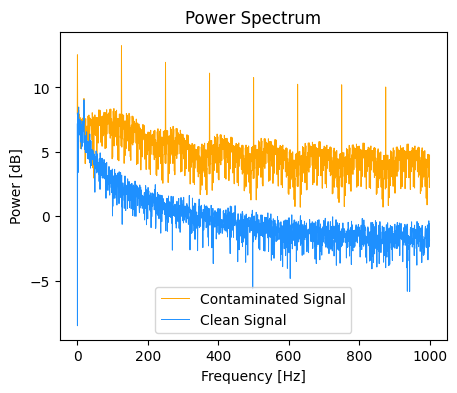

<Figure size 640x480 with 0 Axes>

In [11]:
n = len(X[0])
freqs = np.fft.rfftfreq(n, d=1/fs)
X *= np.sqrt(2)
y *= np.sqrt(2)

plt.figure(figsize=(5, 4))
plt.plot(freqs, X[0][len(freqs)-2:], label='Contaminated Signal', color='orange', alpha=1, linewidth=0.7)
plt.plot(freqs, y[0][len(freqs)-2:], label='Clean Signal', color='dodgerblue', alpha=1, linewidth=0.7)
plt.xlabel('Frequency [Hz]');plt.ylabel('Power [dB]');plt.title('Power Spectrum');plt.legend();plt.show()
plt.tight_layout()